# **CROP LEAF DISEASE DETECTION USING A CONVOLUTIONAL NEURAL NETWORK ALGORITHM**

NAME  : RAIHAN RAFIF

BATCH : HCK-001

# **I. INTRODUCTION**

Agriculture has become an essential part of human life, even today. Agriculture is one of the main sources of food supply throughout the world. Each region has different agricultural commodities. Usually, these commodities are adjusted to the demand and suitability of the type of plant with the land. The increase in the world's population is also a factor that makes the need for agriculture higher. Agricultural activity is not without obstacles. One of the problems often experienced by farmers is plant disease. One part of the plant that is often affected by the disease is the leaf. The amount of production will experience a significant decrease if the leaves of the plant are affected by the disease. This happens because the leaves are a place for plants to produce food for growth. So, fast handling is necessary. One way that can be done to carry out fast handling is early identification of diseases that attack plant leaves.

Deep learning is part of a broader family of machine learning methods based on artificial neural networks with representation learning. One of the algorithms in deep learning is a convolutional neural network or CNN. CNN is a type of artificial neural network, which is widely used for image/object recognition and classification. Deep Learning thus recognizes objects in an image by using a CNN. Initial identification can be done by taking pictures of leaves affected by the disease, then deep learning computing is carried out to create models that can later be used to identify diseases in leaves instantly through images.

## **1. Problem Statement**

Diseases that attack the leaves of agricultural crops can be very detrimental if they are not recognized and handled properly. One way to make treatment more effective and efficient is to perform early identification quickly. The use of CNN in identifying diseases on leaves of agricultural crops can help farmers in carrying out rapid treatment of diseases and avoid losses that can be experienced due to crop failure.

## **2. Objective**

The main objective to be achieved this time is generating and optimizing the CNN model for the identification of diseases that attack the leaves of agricultural plants through image recognition.

# **II. EXPLORATORY ANALYSIS**

## **1. Importing Libraries**

In [20]:
# For data visualization
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pathlib

# For modeling problems
import tensorflow as tf
from tensorflow import keras
from keras import models
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

# For dataset manipulation and model evaluation
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

# For ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **2. Loading The Data**

The dataset was obtained on kaggle.com via the link below:

https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset?select=test

In [2]:
# Defining training, validation, and testing folder
train_folder = r'seg_train/seg_train/'
val_folder = r'seg_test/seg_test/'
test_folder = r'seg_pred/seg_pred/'

In [3]:
# Identifying training and validation folder path
train_dir = pathlib.Path(train_folder)
val_dir = pathlib.Path(val_folder)
# Counting the number of images in training and validation folder
train_count = len(list(train_dir.glob('*/*.jpg')))
val_count = len(list(val_dir.glob('*/*.jpg')))
# Showing the result
print('Number of images in training folder: ', train_count)
print('Number of images in validation folder: ', val_count)

Number of images in training folder:  70295
Number of images in validation folder:  17572


## **3. Data Dictionary**

|**Crop Names**|**Disease Types**|
|:---------|:------------|
|Apple|Healthy|
|Apple|Scab|
|Apple|Black Rot|
|Apple|Cedar Apple Rust|
|Blueberry|Healthy|
|Cherry|(Including Sour) Healthy|
|Cherry|(Including Sour) Powdery Mildew|
|Corn (Maize)|Healthy|
|Corn (Maize)|Cercospora Leaf Spot (Gray Leaf Spot)|
|Corn (Maize)|Common Rust|
|Corn (Maize)|Northern Leaf Blight|
|Grape|Healthy|
|Grape|Black Rot|
|Grape|Esca (Black Measles)|
|Grape|Leaf Blight (Isariopsis Leaf Spot)|
|Orange|Haunglongbing (Citrus Greening)|
|Peach|Healthy|
|Peach|Bacterial Spot|
|Bell Pepper|Healthy|
|Bell Pepper|Bacterial Spot|
|Potato|Healthy|
|Potato|Early Blight|
|Potato|Late Blight|
|Raspberry|Healthy|
|Soybean|Healthy|
|Squash|Powdery Mildew|
|Strawberry|Healthy|
|Strawberry|Leaf Scorch|
|Tomato|Healthy|
|Tomato|Bacterial Spot|
|Tomato|Early Blight|
|Tomato|Late Blight|
|Tomato|Leaf Mold|
|Tomato|Septoria Leaf Spot|
|Tomato|Spider mites (Two-spotted Spider Mite)|
|Tomato|Target Spot|
|Tomato|Tomato Mosaic Virus|
|Tomato|Tomato Yellow Leaf Curl Virus|

## **4.Explorations**

In [4]:
# Defining batch parameters
IMG_WIDTH = 100
IMG_HEIGHT = 100
BATCH_SIZE = 32

In [5]:
# Training dataset preprocessing
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(train_folder, shuffle=True, batch_size=BATCH_SIZE,
                                                                image_size=(IMG_HEIGHT, IMG_WIDTH))

Found 70295 files belonging to 38 classes.


In [6]:
# Validation dataset preprocessing
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(val_folder, image_size=(IMG_HEIGHT, IMG_WIDTH), batch_size=BATCH_SIZE)

Found 17572 files belonging to 38 classes.


In [7]:
# Identifying class name
class_names = train_dataset.class_names
print(class_names)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


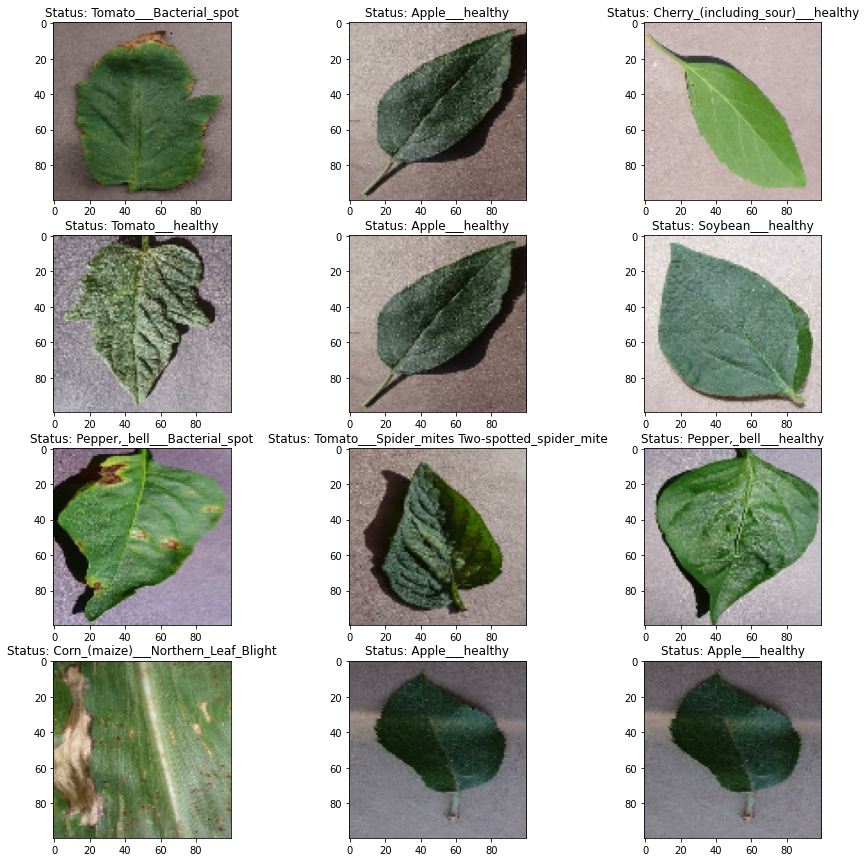

In [8]:
# Setting subplot for dataset images
fig,ax=plt.subplots(4,3)
fig.set_size_inches(15,15)
for next_element in train_dataset:
    x_batch, y_batch = next_element
    for i in range (0,4):
        for j in range(3):
            random_example = np.random.randint(0, BATCH_SIZE)
            ax[i,j].imshow(x_batch[random_example]/250)
            ax[i,j].set_title('Status: '+ train_dataset.class_names[y_batch[random_example].numpy()])
    break

In [9]:
# Identifying image and label batch numbers
for image_batch, labels_batch in train_dataset:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 100, 100, 3)
(32,)


There are 70295 total images in the training dataset image folder, 17572 total images in the validation dataset image folder, and 38 classes of healthy and diseased agricultural plant leave. At least, there are 14 types of agricultural crops are used as input datasets in this modeling. The 14 types of plants are apple, blueberry, cherry, corn, grape, orange, peach, bell pepper, potato, raspberry, soybean, squash, strawberry, and tomato. The pictures above are examples of some pictures of healthy and diseased leaves of agricultural plants. Prior to modeling, the images were made into a size of 100x100 and divided into 32 batches to ease the modeling process on the computer.

# **III. DATA PREPROCESSING**

## **1. Dataset Configuration for Model Running Performance**

In [10]:
# Setting prefecth and shuffle before model running
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dataset.cache().shuffle(50000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

## **2. Dataset Normalization**

In [11]:
# Rescaling the pixel values from [0-255] into [0-1]
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [12]:
# Setting normalization function
normalized_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.98157334


# **IV. MODELING**

## **1. Model Definition**

In [43]:
# Setting class numbers
num_classes = 38
# CNN model architechture
cnn_model = Sequential([
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes)
])

In [44]:
# Model compiling
cnn_model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [45]:
# Model summary
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 128)     

## **2. Model Training**

In [46]:
# Training the model
history = cnn_model.fit(train_dataset, validation_data=val_dataset, epochs=5, batch_size=BATCH_SIZE)

Epoch 1/5
2197/2197 [==============================] - 1066s 485ms/step - loss: 1.2010 - accuracy: 0.6960 - val_loss: 0.5182 - val_accuracy: 0.8395
Epoch 2/5
2197/2197 [==============================] - 889s 404ms/step - loss: 0.4085 - accuracy: 0.8713 - val_loss: 0.4033 - val_accuracy: 0.8762
Epoch 3/5
2197/2197 [==============================] - 862s 391ms/step - loss: 0.2890 - accuracy: 0.9075 - val_loss: 0.5630 - val_accuracy: 0.8454
Epoch 4/5
2197/2197 [==============================] - 882s 401ms/step - loss: 0.2397 - accuracy: 0.9256 - val_loss: 0.4037 - val_accuracy: 0.8918
Epoch 5/5
2197/2197 [==============================] - 845s 384ms/step - loss: 0.2107 - accuracy: 0.9382 - val_loss: 0.5044 - val_accuracy: 0.8740


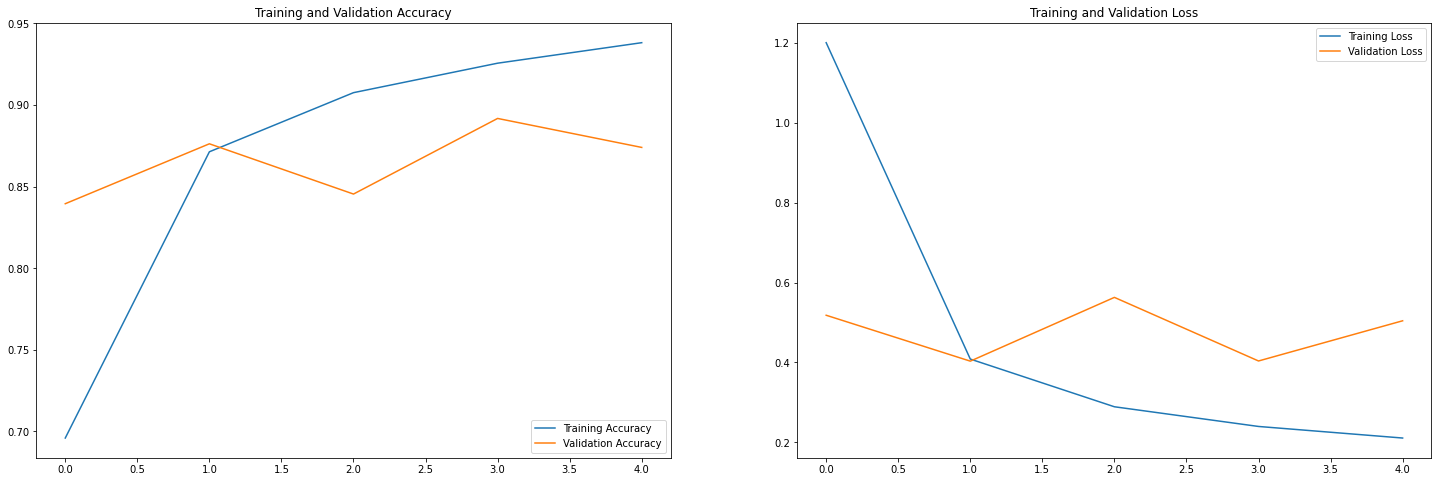

In [50]:
# Visualize training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The initial model was built using a sequential model with 5 epochs. In general, the model results have shown a good graph between training loss and accuracy and validation loss and accuracy. However, there is still overfitting, so an improvement model is needed.

## **3. Model Improvement**

In [51]:
# Data augmentation
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [52]:
# CNN model architechture
cnn_model_improved = Sequential([
    data_augmentation,
    layers.InputLayer(input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.Dropout(0.1),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Dropout(0.15),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [53]:
# Model compiling
cnn_model_improved.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
# Setting early stop
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=2, restore_best_weights=True)

In [54]:
# Model summary
cnn_model_improved.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 100, 100, 3)       0         
                                                                 
 input_5 (InputLayer)        multiple                  0         
                                                                 
 conv2d_12 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 dropout (Dropout)           (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 50, 64)        18496     
                                                      

In [56]:
# Training the model
history_improved = cnn_model_improved.fit(train_dataset, validation_data=val_dataset, epochs=15, callbacks=early_stop, batch_size=BATCH_SIZE)

Epoch 1/15
2197/2197 [==============================] - 1860s 847ms/step - loss: 1.6153 - accuracy: 0.5309 - val_loss: 0.9067 - val_accuracy: 0.7157
Epoch 2/15
2197/2197 [==============================] - 1850s 841ms/step - loss: 0.6395 - accuracy: 0.8007 - val_loss: 0.6752 - val_accuracy: 0.7904
Epoch 3/15
2197/2197 [==============================] - 2090s 951ms/step - loss: 0.4817 - accuracy: 0.8489 - val_loss: 0.4848 - val_accuracy: 0.8483
Epoch 4/15
2197/2197 [==============================] - 1835s 834ms/step - loss: 0.4209 - accuracy: 0.8669 - val_loss: 0.4666 - val_accuracy: 0.8545
Epoch 5/15
2197/2197 [==============================] - 1634s 743ms/step - loss: 0.3739 - accuracy: 0.8827 - val_loss: 0.4556 - val_accuracy: 0.8562
Epoch 6/15
2197/2197 [==============================] - 1288s 585ms/step - loss: 0.3533 - accuracy: 0.8916 - val_loss: 0.3787 - val_accuracy: 0.8828
Epoch 7/15
2197/2197 [==============================] - 1258s 572ms/step - loss: 0.3302 - accuracy: 0.8988

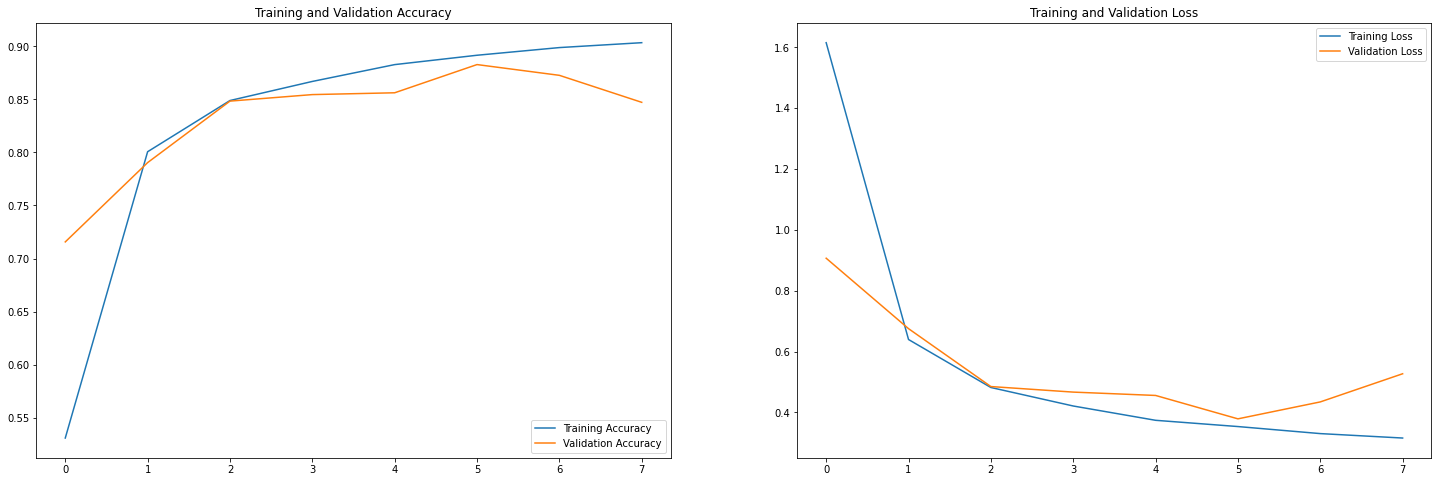

In [58]:
# Visualize training results
acc_improved = history_improved.history['accuracy']
val_acc_improved = history_improved.history['val_accuracy']

loss_improved = history_improved.history['loss']
val_loss_improved = history_improved.history['val_loss']

epochs_range_improved = range(8)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range_improved, acc_improved, label='Training Accuracy')
plt.plot(epochs_range_improved, val_acc_improved, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range_improved, loss_improved, label='Training Loss')
plt.plot(epochs_range_improved, val_loss_improved, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Some of the improvements made are by adding data augmentation and dropout, increasing the number of epochs, and implementing callbacks using the early stop method. Data augmentation takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better. Dropout randomly drops out a number of output units from the layer during the training process. Dropout input value yang digunakan adalah 0.1, 0.15, dan 0.2. This means dropping out 10%, 15%, or 20% of the output units randomly from the applied layer. The number of epochs was also added to 15 to increase the time in the learning model process and finally, an early stop was applied to anticipate performance declines and stop iterations at the most optimal results. The obtained epoch = 7 is the most optimal number of iterations. In addition, overfitting has also been overcome as evidenced by the accuracy training value of 0.89 and accuracy validation of 0.88.

## **5. Model Saving**

In [59]:
# Model saving
cnn_model_improved.save('cnn_model_improved.h5')
np.save('history_cnn_model_improved.npy', history.history)

## **6. Model Evaluation**

In [13]:
# Importing saved model
path = 'D:/FTDS Boothcamp Hacktiv8/Phase 2/W2/Milestone 2/'
history_loaded = np.load(path + 'history_cnn_model_improved.npy', allow_pickle='TRUE').item()
cnn_model_loaded = load_model(path + "cnn_model_improved.h5")

In [14]:
# Get images for testing data into list
list_files = []
list_category = []
test_dir = 'D:/FTDS Boothcamp Hacktiv8/Phase 2/W2/Milestone 2/test'
for dirname, _, filenames in os.walk(test_dir):
    for filename in filenames:
        list_files.append(os.path.join(dirname, filename))
        list_category.append(filename.split('.JPG')[0])

In [18]:
# Model prediction
classes = train_dataset.class_names
pred = pd.DataFrame()
pred['y_label'] = list_category
pred['y_pred'] = np.nan
i = 0
for image_path in list_files:
    new_img = image.load_img(image_path, target_size=(100, 100))
    img = image.img_to_array(new_img)
    img = np.expand_dims(img, axis=0)
    prediction = np.argmax(cnn_model_loaded.predict(img))
    class_pred = classes[prediction].replace('_', '')\
    .replace('(maize)', '').lower()\
    .replace('leaf', '')\
    .replace('tomatotomato', 'tomato')\
    .replace('appleapple', 'apple')\
    .replace('applecedarapplerust', 'applecedarrust')\
    .lower()\

    pred.loc[i, 'y_pred'] = class_pred
    pred.loc[i, 'acc'] = class_pred in list_category[i].lower()
    i = i + 1
    if i==1:# getting a second example
        img2 = img
    if i==4:# getting a second example
        img3 = img

1/1 [==============================] - 0s 48ms/step


In [19]:
# Prediction result
print(pred.acc.mean())
print(pred)

0.696969696969697
                   y_label                 y_pred    acc
0          AppleCedarRust1         applecedarrust   True
1          AppleCedarRust2         applecedarrust   True
2          AppleCedarRust3         applecedarrust   True
3          AppleCedarRust4         applecedarrust   True
4               AppleScab1              applescab   True
5               AppleScab2              applescab   True
6               AppleScab3      potatoearlyblight  False
7          CornCommonRust1         corncommonrust   True
8          CornCommonRust2         corncommonrust   True
9          CornCommonRust3         corncommonrust   True
10      PotatoEarlyBlight1      potatoearlyblight   True
11      PotatoEarlyBlight2      potatoearlyblight   True
12      PotatoEarlyBlight3      tomatoearlyblight  False
13      PotatoEarlyBlight4      potatoearlyblight   True
14      PotatoEarlyBlight5      potatoearlyblight   True
15          PotatoHealthy1     pepper,bellhealthy  False
16          P

Prediction accuracy results on testing data get results that are not too good even though the model has obtained good performance without overfitting. This can happen because the amount of data used for model testing is not too much, and does not represent all the existing classes. The dataset used for the testing model is 33 image data and only represents 8 classes out of 38 classes. This is indicated to be the main cause of the poor results of the model testing carried out.

## **7. Model Inference**

In [86]:
# Defining testing image
test_image = r'D:\FTDS Boothcamp Hacktiv8\Phase 2\W2\Milestone 2\seg_pred\Apple___Apple_scab\AppleScab1.JPG'

# Image predict
img = keras.preprocessing.image.load_img(
    test_image, target_size=(IMG_HEIGHT, IMG_WIDTH)
)

In [87]:
# Image manipulation
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
# Image predicting
predictions = cnn_model_improved.predict(img_array)
score = tf.nn.softmax(predictions[0])
# Showing the result
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 41ms/step
This image most likely belongs to Apple___Apple_scab with a 6.50 percent confidence.


The model inference is done by taking data through Google and trying to do recognition using the model that has been created. The model can recognize images well even though the confidence percentage is not too high.

# **V. Overall Analysis and Conclusion**

Diseases that attack agricultural crops are one of the main causes for farmers to fail and suffer huge losses. In addition, the food supply can also be disrupted. One part of the plant that is often attacked by disease is the leaf. Leaves are important organs in plants because they play a role in producing manure for plants. If the leaf is disturbed, then its function as a food supplier for the plant will be disrupted and cause the plant to not develop normally and interfere with its production. Deep Learning using Convolutional Neural Network is used for game recognition which is built using leaf image input of several agricultural plants, both healthy and diseased. Before the model is created, the input image is standardized and normalized so that modeling can run and take less time. The entire input image is rendered to a size of 100x100 and divided into 32 processing batches. The initial model was created without adding a hyperparameter and was left running by default. The resulting model with the number of epochs = 5 takes approximately 1 hour and 1 epoch takes 12 minutes of running time. This default model is overfitting, where training accuracy gets a value of 0.92 and validation accuracy gets a value of 0.87. Then, improvements are made to the model by setting the model's hyperparameters. Augmentation and dropout data (0.1, 0.15, and 0.2) are applied to the model. Then the epoch was made to 15 to give the model a long time in the learning process. In addition, callback(early stop) is used to stop the iteration process at the first time the model starts to experience a decline in performance, thereby reducing the computational load and speeding up the modeling process. The model that has experienced this improvement gets pretty good results without any overfitting with a training accuracy value of 0.89 and a validation accuracy of 0.88. In addition, when viewed on the training graph and validation accuracy and loss, there is no vanishing and exploding. After the best model is obtained, model testing is carried out using new data input. Unfortunately, the results are not good only getting an accuracy of 0.69. An indication of the main cause of poor model performance in the testing model is the amount of data input that is too small, namely 33 images. In addition, the 33 images do not represent all existing classes, whereas the 33 images only represent 8 classes, while the model made has a total of 38 classes of healthy and diseased plant leaves. Suggestions for the future, the number of input images in the testing model is increased and must represent all classes in the model to get much better results. Data inference is done to test the model with new data. The model can run without any problems even though the percentage of identification confidence is still very low. This can also be used as an evaluation to develop a better model.